# Pynamical: demo of the Cubic Map, Singer Map, and Mandelbrot Map

Pynamical can be used to simulate, visualize, and explore any discrete dynamical system. This notebook demonstrates how to do this with two additional models that come included in the Pynamical module (the *Cubic Map* and the *Singer Map*) as well as with one additional model defined in this notebook (the *Mandelbrot Map*). Any other models can be created and easily plugged-in, as demonstrated below.

In [1]:
from pynamical import simulate, cubic_map, singer_map, bifurcation_plot, phase_diagram, phase_diagram_3d
from numba import jit
%matplotlib inline

## Cubic map

First we visualize the behavior of the *Cubic Map*. To do this, our code is nearly identical to the previous [examples using the Logistic Map](pynamical-demo-logistic-model.ipynb), with the exception that we are now passing `model=cubic_map` into our `simulate` function.

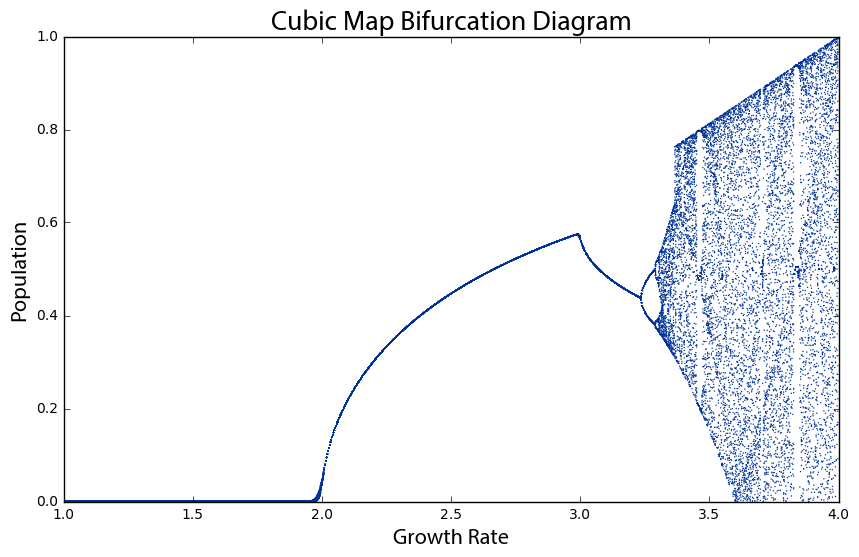

In [2]:
pops = simulate(model=cubic_map, num_gens=100, rate_min=1, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, title='Cubic Map Bifurcation Diagram', xmin=1, xmax=4, save=False)

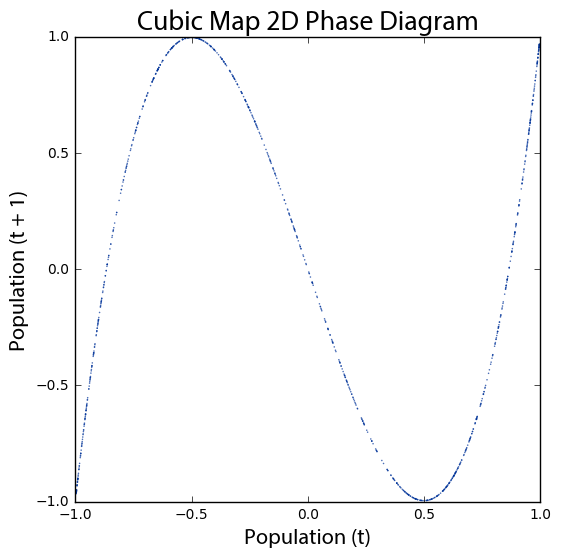

In [3]:
pops = simulate(model=cubic_map, num_gens=1000, rate_min=3.99, num_rates=1, num_discard=100)
phase_diagram(pops, xmin=-1, xmax=1, ymin=-1, ymax=1, save=False, title='Cubic Map 2D Phase Diagram')

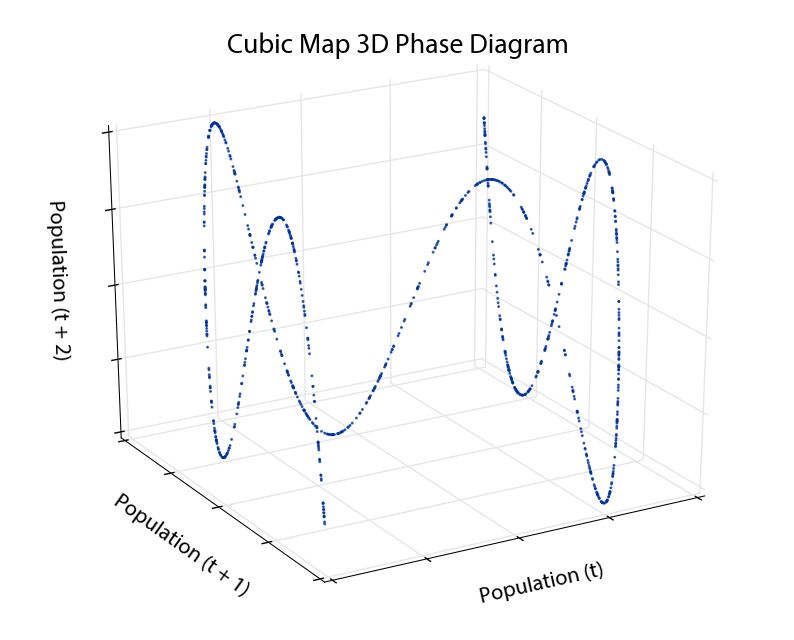

In [4]:
pops = simulate(model=cubic_map, num_gens=1000, rate_min=3.99, num_rates=1, num_discard=100)
phase_diagram_3d(pops, xmin=-1, xmax=1, ymin=-1, ymax=1, zmin=-1, zmax=1, save=False, title='Cubic Map 3D Phase Diagram')

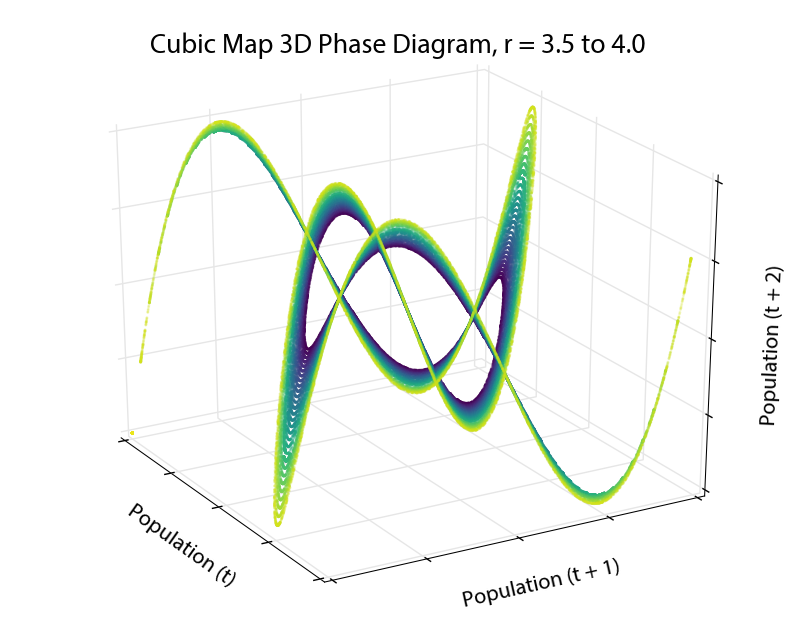

In [5]:
pops = simulate(model=cubic_map, num_gens=3000, rate_min=3.5, num_rates=30, num_discard=100)
phase_diagram_3d(pops, xmin=-1, xmax=1, ymin=-1, ymax=1, zmin=-1, zmax=1, save=False, alpha=0.2, color='viridis',
                 azim=330, title='Cubic Map 3D Phase Diagram, r = 3.5 to 4.0')

## Singer Map

Next we visualize the behavior of the *Singer Map*. We pass `model=singer_map` into our `simulate` function.

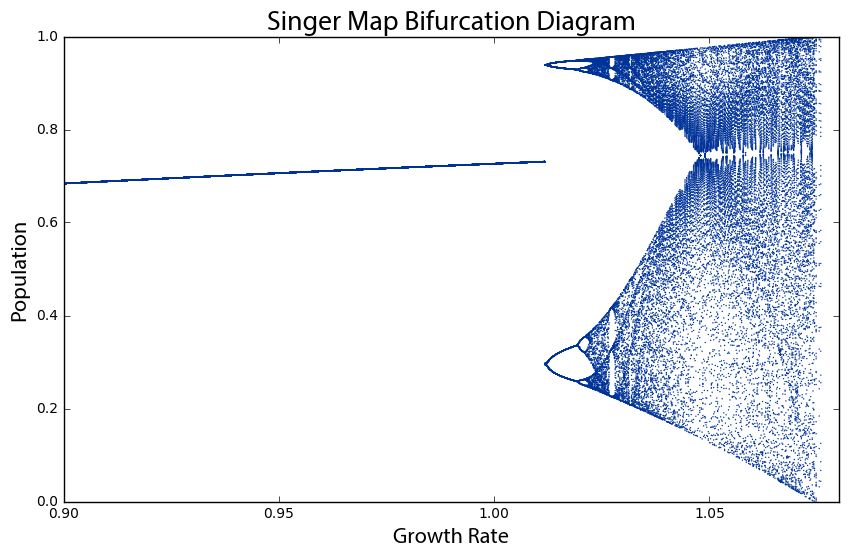

In [6]:
pops = simulate(model=singer_map, num_gens=100, rate_min=0.9, rate_max=1.08, num_rates=1000, num_discard=100)
bifurcation_plot(pops, title='Singer Map Bifurcation Diagram', xmin=0.9, xmax=1.08, save=False)

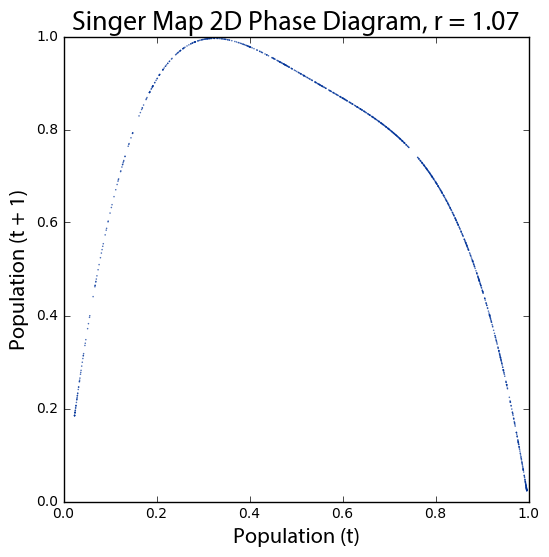

In [7]:
pops = simulate(model=singer_map, num_gens=1000, rate_min=1.07, num_rates=1, num_discard=100)
phase_diagram(pops, title='Singer Map 2D Phase Diagram, r = 1.07', save=False)

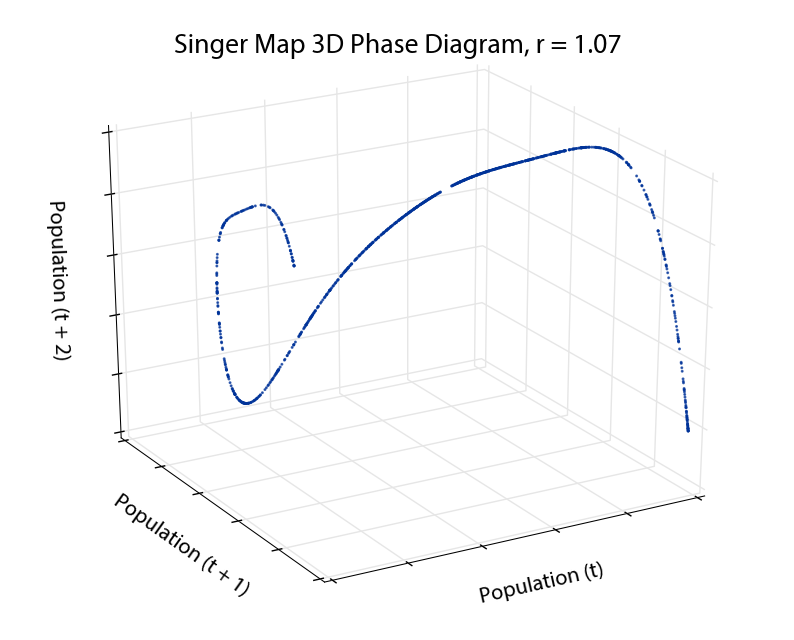

In [8]:
pops = simulate(model=singer_map, num_gens=1000, rate_min=1.07, num_rates=1, num_discard=100)
phase_diagram_3d(pops, title='Singer Map 3D Phase Diagram, r = 1.07', save=False)

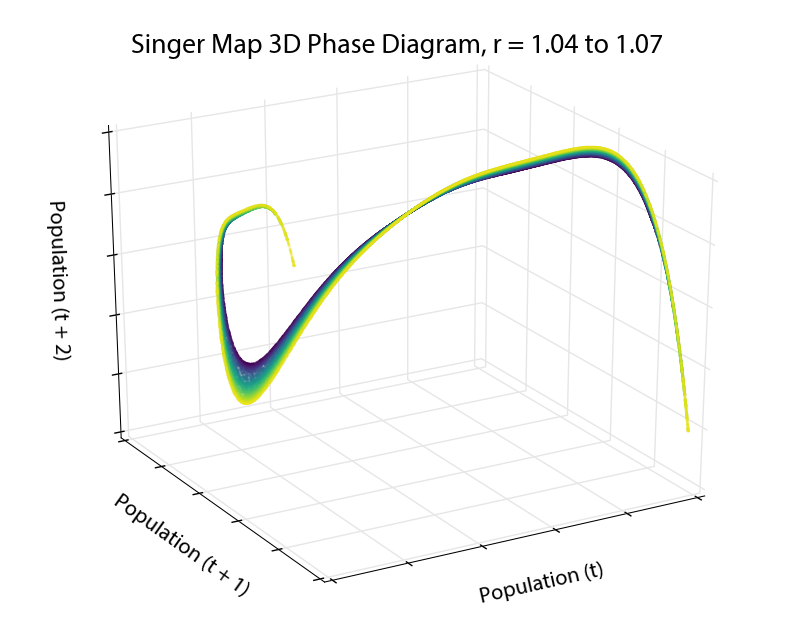

In [9]:
pops = simulate(model=singer_map, num_gens=3000, rate_min=1.04, rate_max=1.07, num_rates=30, num_discard=100)
phase_diagram_3d(pops, save=False, alpha=0.2, color='viridis', title='Singer Map 3D Phase Diagram, r = 1.04 to 1.07')

## ...Or define your own model

Here we define the equation for the *Mandelbrot Map* and then visualize its behavior (use jit to compile it for fast simulation).

In [10]:
@jit(cache=True, nopython=True)
def mandelbrot_map(pop, rate):
    return pop ** 2 + rate

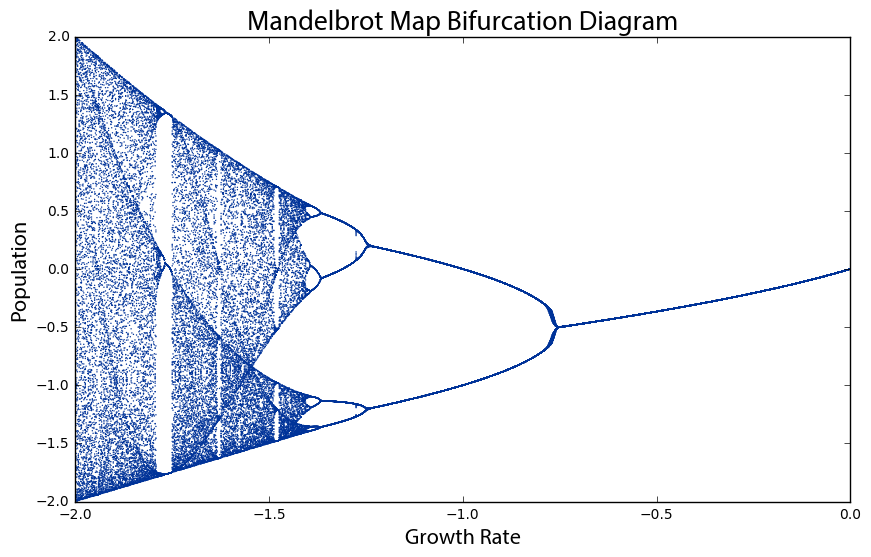

In [11]:
pops = simulate(model=mandelbrot_map, num_gens=100, rate_min=-2, rate_max=0, num_rates=1000, num_discard=100)
bifurcation_plot(pops, title='Mandelbrot Map Bifurcation Diagram', xmin=-2, xmax=0, ymin=-2, ymax=2, save=False)

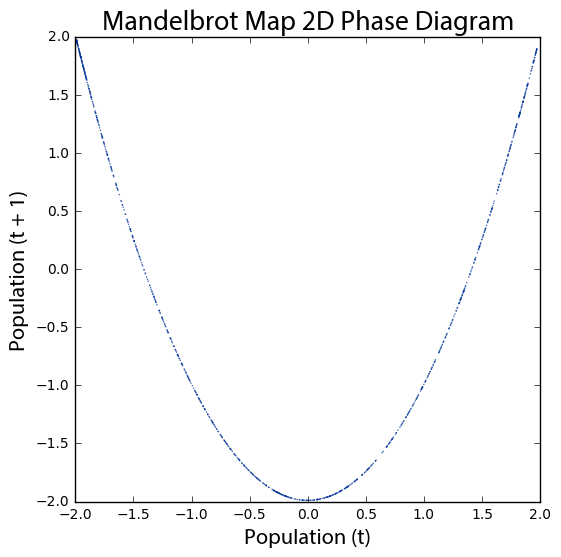

In [12]:
pops = simulate(model=mandelbrot_map, num_gens=1000, rate_min=-1.99, num_rates=1, num_discard=100)
phase_diagram(pops, title='Mandelbrot Map 2D Phase Diagram', xmin=-2, xmax=2, ymin=-2, ymax=2, save=False)

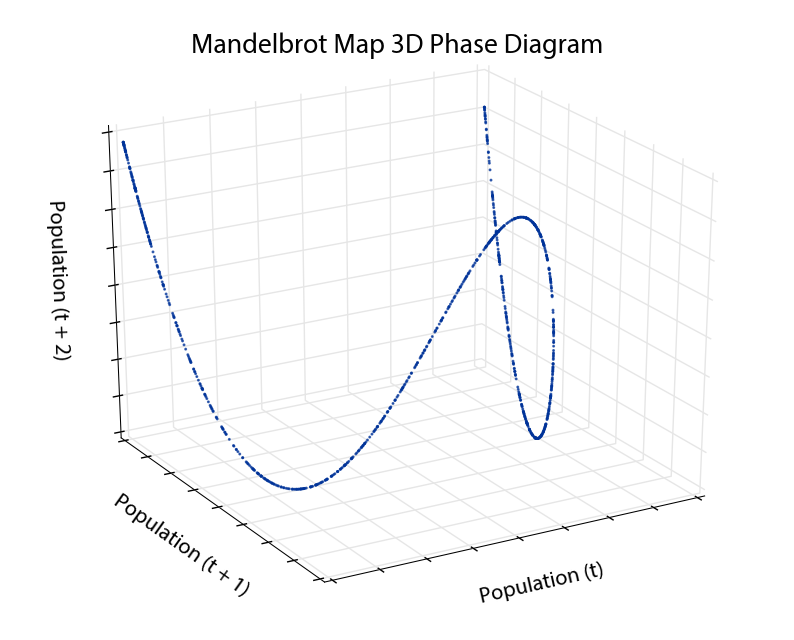

In [13]:
pops = simulate(model=mandelbrot_map, num_gens=1000, rate_min=-1.99, num_rates=1, num_discard=100)
phase_diagram_3d(pops, title='Mandelbrot Map 3D Phase Diagram', xmin=-2, xmax=2, ymin=-2, ymax=2, zmin=-2, zmax=2, save=False)

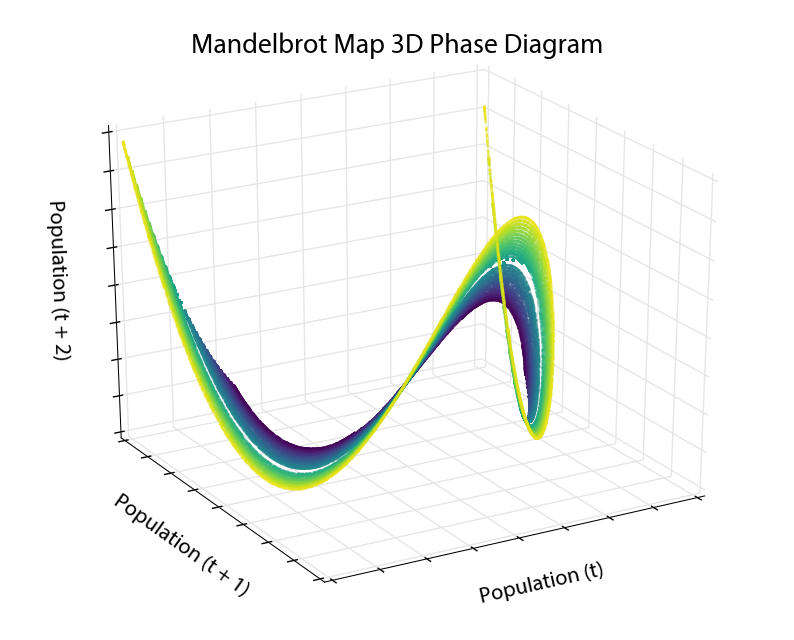

In [14]:
pops = simulate(model=mandelbrot_map, num_gens=3000, rate_min=-1.99, rate_max=-1.5, num_rates=30, num_discard=100)
phase_diagram_3d(pops, title='Mandelbrot Map 3D Phase Diagram', alpha=0.2, color='viridis', color_reverse=True,
                 xmin=-2, xmax=2, ymin=-2, ymax=2, zmin=-2, zmax=2, save=False)